In [2]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import datetime as dt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [7]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile('gws/open/Student/citibike' + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + 'gws/open/Student/citibike'):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile('gws/open/Student/citibike' + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + 'gws/open/Student/citibike')
            ### unzip the csv 
            os.system("unzip " + 'gws/open/Student/citibike' + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + 'gws/open/Student/citibike')
    ### One final check:
    if not os.path.isfile('gws/open/Student/citibike' + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [12]:
import zipfile

zf = zipfile.ZipFile('201501-citibike-tripdata.zip') # having First.csv zipped file.
df = pd.read_csv(zf.open('201501-citibike-tripdata.csv'))
#df = pd.read_csv('https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip')

In [13]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


IDEA:

Men are more likely than women to choose biking during nighttime

NULL HYPOTHESIS:

The ratio of man biking during nighttime (7pm - 5am) over man biking during daytime (5am - 7pm) is lower than the ratio of woman biking over nighttime to woman biking during daytime

Ho : $\frac{M{\mathrm{night}}}{M{\mathrm{day}}} <= \frac{W{\mathrm{night}}}{W_{\mathrm{day}}}$

Ha : $\frac{M{\mathrm{night}}}{M{\mathrm{day}}} > \frac{W{\mathrm{night}}}{W_{\mathrm{day}}}$

I will use a significance level $\alpha=0.05$ which means i want the probability of getting a result at least as significant as mine to be less then 5%

I am starting with a single month of data: reading data from citibike csv file from Jan 2015

In [15]:
df['time'] = df['starttime'].apply(lambda x : pd.to_datetime(x).time())

In [16]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,time
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,00:05:00


In [18]:
time1 = dt.datetime.strptime('05:00:00.000-0000','%H:%M:%S.%f%z').time()
time2 = dt.datetime.strptime('19:00:00.000-0000','%H:%M:%S.%f%z').time()

In [19]:
def time_checker(t):
    if t < time1:
        return 'Nighttime Rider'
    elif t > time2:
        return 'Nighttime Rider'
    else:
        return 'Daytime Rider'

In [20]:
df['type'] = df['time'].apply(lambda x: time_checker(x))

In [21]:
df2 = df[['gender','type']]
df2.head()

,gender,type
0,2,Nighttime Rider
1,1,Nighttime Rider
2,1,Nighttime Rider
3,1,Nighttime Rider
4,1,Nighttime Rider


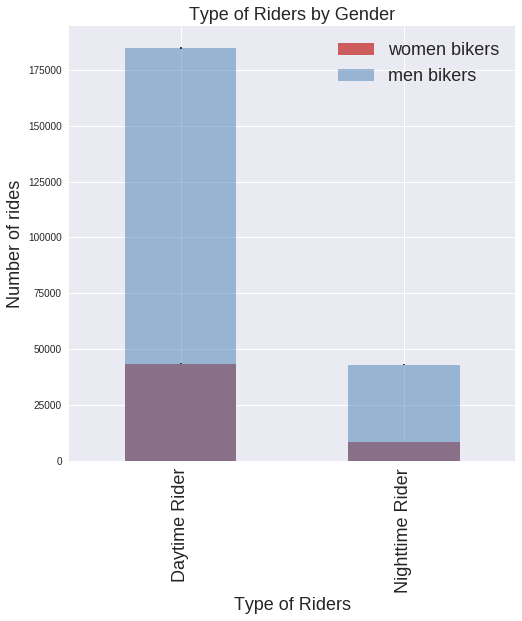

In [22]:
fig=pl.figure(figsize(8,8))
counts_w = df2.type[df.gender == 2].groupby([df.type]).count()
norm_w = 1
error_w = np.sqrt(counts_w)
ax=((counts_w) / norm_w).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')

counts_m = df2.type[df.gender == 1].groupby([df.type]).count()
norm_m = 1
error_m = np.sqrt(counts_m)
ax=((counts_m) / norm_m).plot(kind="bar",color='SteelBlue',  yerr=[
            ((error_m) / norm_m, (error_m) / norm_m)], label='men bikers', alpha = 0.5)

ax.xaxis.set_ticklabels(['Daytime Rider', 'Nighttime Rider'], fontsize=18)
ax.set_ylabel ("Number of rides", fontsize = 18)
ax.set_xlabel ("Type of Riders", fontsize =18)
ax.set_title ('Type of Riders by Gender', fontsize = 18)

pl.legend(['women bikers','men bikers'],fontsize=18)

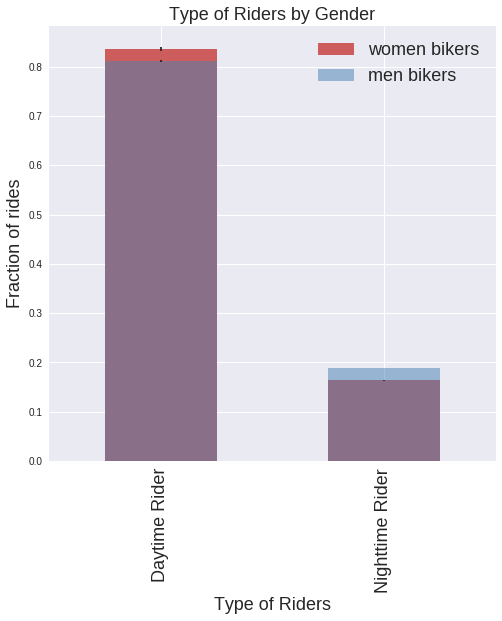

In [23]:
fig = pl.figure(figsize(8,8))

norm_w = counts_w.sum()
error_w = np.sqrt(counts_w)
((counts_w) / norm_w).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_w) / norm_w, (error_w) / norm_w)], 
                           label='women bikers')

norm_m = counts_m.sum()
ax = ((counts_m) / norm_m).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                                color='SteelBlue', label='men bikers')

ax.xaxis.set_ticklabels(['Daytime Rider', 'Nighttime Rider'], fontsize=18)
ax.set_ylabel ("Fraction of rides", fontsize = 18)
ax.set_xlabel ("Type of Riders", fontsize =18)
ax.set_title ('Type of Riders by Gender', fontsize = 18)

pl.legend(['women bikers','men bikers'],fontsize=18)